# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
sum(data[data.race=='b'].call)

157.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


## 1. What test is appropriate for this problem? Does CLT apply?

The appropiate test for this problem is the A/B testing to evaluate if there is a statistically significant difference between the number of white and black sounding names that get a callback from a job.

The CLT does apply in this case as the following requirements are met:

Random: According to the data source, the sample comes from a "randomized field experiment"
Normal: The sample for both white and black has more than 10 positive (call) and negative (no call) observations
Independent: The sample was taken without replacement but it is less than 10% of the population

## 2. What are the null and alternate hypotheses?

### H0 - There is no difference between the proportion of white and black names who get a call back for a job
### H1 - There proportion of black names who get a call back is less than the proportion of white names

## 4. Write a story describing the statistical significance in the context or the original problem.

Racism and discrimination in the United States is a social problem that has been present since the colonial era. There have been significant efforts to implement laws and regulations to punish these behaviors and to incentive inclusion of minorities.

However, minorities today do not have the same treatment or opportunities and there is a widespread bias against black people and other groups.

We are going to evaluate if in today’s market the black-sounding names are receiving a statistically significant difference in the number of callbacks after job interviews.


## 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

It does not mean that race/name is the most important factor in callback success, what it means is that black-sounding names get less callbacks than white-sounding names on average.

The analysis we did is only comparing the proportion of black-names that get a callback vs the proportion of white names that get a callback after a job interview with identical resumes. We are not evaluating what factors have more influence in the callback success rates.

A good start to evaluate the factors that have higher influence in the callback success rate is to analyze the correlations of the different features of the observations vs the callback rate


## 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [6]:
# Calculating p, n and variance of white names
w_call = data.call[data.race=="w"]
n_w_call = len(w_call)
p_w_call = w_call.mean()
var_w_call = p_w_call * (1 - p_w_call) / n_w_call

In [7]:
# Calculating p, n and variance of black names
b_call = data.call[data.race=="b"]
n_b_call = len(b_call)
p_b_call = b_call.mean()
var_b_call = p_b_call * (1 - p_b_call) / n_b_call

In [8]:
print("White names total observations: ", n_w_call)
print("Black names total observations: ", n_b_call)
print("White names sample call proportion: ", p_w_call)
print("Black names sample call proportion: ", p_b_call)
print("White names sample call variance: ", var_w_call)
print("Black names sample call variance: ", var_b_call)

White names total observations:  2435
Black names total observations:  2435
White names sample call proportion:  0.09650924056768417
Black names sample call proportion:  0.0644763857126236
White names sample call variance:  3.5809119939520754e-05
Black names sample call variance:  2.4771737740476626e-05


In [9]:
b_call_pop_ratio = np.sum(b_call) / (n_b_call + n_w_call)
w_call_pop_ratio = np.sum(w_call) / (n_b_call + n_w_call)
print("Black callback proportion over total sample: ", b_call_pop_ratio)
print("White callback proportion over total sample: ", w_call_pop_ratio)

Black callback proportion over total sample:  0.03223819301848049
White callback proportion over total sample:  0.048254620123203286


### Bootstrap Method

In [10]:
def black_fraction(black_calls, white_calls):
    '''Returns the fraction of black names who were called back from entire population'''
    
    black_fraction = np.sum(black_calls) / (len(black_calls) + len(white_calls))
    return black_fraction

In [11]:
def draw_replicates_permutation(data1, data2, func, size=1000):
    '''Returns random permutations of the samples'''
    
    join_samples = np.concatenate((data1, data2))
    
    bs_perm_replicates = np.empty(size)
    
    for i in range(size):
        random_samples = np.random.permutation(join_samples)
        data1_perm = random_samples[:len(data1)]
        data2_perm = random_samples[len(data1):]
        bs_perm_replicates[i] = func(data1_perm, data2_perm)
        
    return bs_perm_replicates

In [12]:
simulations_black_cb = draw_replicates_permutation(b_call, w_call, black_fraction, size=100000)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


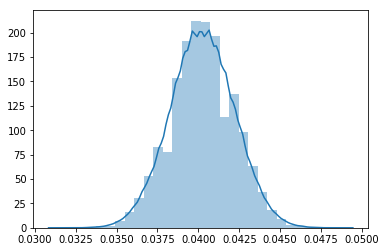

In [13]:
sns.distplot(simulations_black_cb, bins=30)

In [14]:
p_value_bs = np.sum(simulations_black_cb <= b_call_pop_ratio) / len(simulations_black_cb)
p_value_bs

1e-05

In [15]:
confidence_interval_bs = np.percentile(simulations_black_cb, [2.5, 97.5])
print("The 95% confidence interval is: ", confidence_interval_bs)

The 95% confidence interval is:  [0.03634497 0.04414784]


In [16]:
marg_error_bs = (confidence_interval_bs[1] - confidence_interval_bs[0])/2
print("The margin of error is: ", marg_error_bs)

The margin of error is:  0.003901437371663246


### Frequentist Method

In [17]:
# H0: p_w_call == p_b_call
# p_w_call - p_wb_call = 0 = diff_wb
diff_wb = 0
var_diff_wb = var_w_call + var_b_call
std_diff_wb = np.sqrt(var_diff_wb)

# H1: p_b_call < p_w_call
sample_diff = p_w_call - p_b_call

print("Standard deviation of difference: ", std_diff_wb)
print("Mean of difference: ", sample_diff)

Standard deviation of difference:  0.00778337058606343
Mean of difference:  0.03203285485506058


In [18]:
p_value_freq = stats.norm.pdf(sample_diff, loc=diff_wb, scale=std_diff_wb)
print("The probability of getting a sample with this difference is: ", p_value_freq)

The probability of getting a sample with this difference is:  0.010758590006685142


In [19]:
z_score95 = 1.96
confidence_freq = [sample_diff - std_diff_wb * (z_score95), sample_diff + std_diff_wb*(z_score95)]
print("The 95% confidence interval is: ", confidence_freq)

The 95% confidence interval is:  [0.016777448506376254, 0.0472882612037449]


In [20]:
marg_error_freq = std_diff_wb * (z_score95)
print("The margin of error is: ", marg_error_freq)

The margin of error is:  0.015255406348684322
